# **Airlines Data Analysis**

Steps Involved:
*   Understanding the Business Problem
*   Importing Libraries
*   Database connection to extract data
*   Exploring Tables to identify key variables
*   Analyzing the key variables
*   Creating reports and results for the company

In [ ]:
# Mounting Google drive with Google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Libraries
import sqlite3                   # lightweight, serverless and self-contained database
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings                  # to ignore warning
warnings.filterwarnings('ignore')

### **Database Connections**

In [ ]:
# Database Connections -to connect with database
connection = sqlite3.connect('/content/drive/MyDrive/Colab Notebooks/travel.sqlite')
cursor = connection.cursor()

In [ ]:
connection
cursor

In [ ]:
# Retrieve the names of all tables present in the SQLite database
cursor.execute('''
select name from sqlite_master
where type = "table";
''')

In [ ]:
# Printing list of all table names
print('List of tables in Database:')
table_list = [table[0] for table in cursor.fetchall()]
table_list         # 8 tables are present in database

List of tables in Database:


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

### **Data Exploration**
*   pd.read_sql_query() - it gives result in the form of DataFrame
(Here, we can use all the functionality of df)
*   cursor.execute() - it gives results in the form of list

In [ ]:
# Data Exploration -Table and its Features exploration
aircrafts_data = pd.read_sql_query('select * from aircrafts_data', con=connection)
aircrafts_data                # (9, 3)

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [ ]:
airports_data = pd.read_sql_query('select * from airports_data', con=connection)
airports_data.shape            # (104, 5)
airports_data.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [ ]:
boarding_passes = pd.read_sql_query('select * from boarding_passes', con=connection)
boarding_passes.shape             # (579686, 4)
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [ ]:
bookings = pd.read_sql_query('select * from bookings', con=connection)
bookings.shape                   # (262788, 3)
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [ ]:
flights = pd.read_sql_query('select * from flights', con=connection)
flights.shape              # (33121, 10)
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [ ]:
seats = pd.read_sql_query('select * from seats', con=connection)
seats.shape                    # (1339, 3)
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [ ]:
ticket_flights = pd.read_sql_query('select * from ticket_flights', con=connection)
ticket_flights.shape           # (1045726, 4)
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [ ]:
tickets = pd.read_sql_query('select * from tickets', con=connection)
tickets.shape         # (366733, 3)
tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


In [ ]:
# Getting each table shape using loop
table_list = ['aircrafts_data','airports_data','boarding_passes',
              'bookings','flights','seats','ticket_flights','tickets']
for i in table_list:
  df = pd.read_sql_query(f'select * from {i}', con=connection)
  print(i,':', df.shape)

aircrafts_data : (9, 3)
airports_data : (104, 5)
boarding_passes : (579686, 4)
bookings : (262788, 3)
flights : (33121, 10)
seats : (1339, 3)
ticket_flights : (1045726, 4)
tickets : (366733, 3)


In [ ]:
# Getting all tables details using loop
table_list = ['aircrafts_data','airports_data','boarding_passes',
              'bookings','flights','seats','ticket_flights','tickets']
for i in table_list:
  df = pd.read_sql_query(f'select * from {i}', con=connection)
  print(i,'\n', df.head())
  print('~~~~~~~~~~~~~~~~~~~~~~~~~~')

aircrafts_data 
   aircraft_code                                              model  range
0           773    {"en": "Boeing 777-300", "ru": "Боинг 777-300"}  11100
1           763    {"en": "Boeing 767-300", "ru": "Боинг 767-300"}   7900
2           SU9  {"en": "Sukhoi Superjet-100", "ru": "Сухой Суп...   3000
3           320  {"en": "Airbus A320-200", "ru": "Аэробус A320-...   5700
4           321  {"en": "Airbus A321-200", "ru": "Аэробус A321-...   5600
~~~~~~~~~~~~~~~~~~~~~~~~~~
airports_data 
   airport_code                                       airport_name  \
0          YKS          {"en": "Yakutsk Airport", "ru": "Якутск"}   
1          MJZ            {"en": "Mirny Airport", "ru": "Мирный"}   
2          KHV  {"en": "Khabarovsk-Novy Airport", "ru": "Хабар...   
3          PKC        {"en": "Yelizovo Airport", "ru": "Елизово"}   
4          UUS  {"en": "Yuzhno-Sakhalinsk Airport", "ru": "Хом...   

                                                city  \
0                  {"en":

In [ ]:
# Method1: Getting datatype of columns in each table using loop
table_list = ['aircrafts_data','airports_data','boarding_passes',
              'bookings','flights','seats','ticket_flights','tickets']
for i in table_list:
  df = pd.read_sql_query(f'select * from {i}', con=connection)
  print(i,'\n', df.dtypes)
  print('~~~~~~~~~~~~~~~~~')

aircrafts_data 
 aircraft_code    object
model            object
range             int64
dtype: object
~~~~~~~~~~~~~~~~~
airports_data 
 airport_code    object
airport_name    object
city            object
coordinates     object
timezone        object
dtype: object
~~~~~~~~~~~~~~~~~
boarding_passes 
 ticket_no      object
flight_id       int64
boarding_no     int64
seat_no        object
dtype: object
~~~~~~~~~~~~~~~~~
bookings 
 book_ref        object
book_date       object
total_amount     int64
dtype: object
~~~~~~~~~~~~~~~~~
flights 
 flight_id               int64
flight_no              object
scheduled_departure    object
scheduled_arrival      object
departure_airport      object
arrival_airport        object
status                 object
aircraft_code          object
actual_departure       object
actual_arrival         object
dtype: object
~~~~~~~~~~~~~~~~~
seats 
 aircraft_code      object
seat_no            object
fare_conditions    object
dtype: object
~~~~~~~~~~~~~~~~~
ticket

In [ ]:
# Method2: Getting datatype of columns in each table using PRAGMA
# PRAGMA query is used when we wants to find the info of any table in SQL
table_list = ['aircrafts_data','airports_data','boarding_passes',
              'bookings','flights','seats','ticket_flights','tickets']
for i in table_list:
  column_info = connection.execute(f'PRAGMA table_info({i})')
  print(i)
  for j in column_info.fetchall():
    print(j[1:3])
  print('~~~~~~~~~~~~~~~~~~~')

aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'integer')
~~~~~~~~~~~~~~~~~~~
airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'text')
~~~~~~~~~~~~~~~~~~~
boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'integer')
('boarding_no', 'integer')
('seat_no', 'character varying(4)')
~~~~~~~~~~~~~~~~~~~
bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')
~~~~~~~~~~~~~~~~~~~
flights
('flight_id', 'integer')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')
~~~~~~~~~~~~~~~~~~~
seats
('aircraft_cod

In [ ]:
# checking null values in each of the table
table_list = ['aircrafts_data','airports_data','boarding_passes',
              'bookings','flights','seats','ticket_flights','tickets']
for i in table_list:
  df = pd.read_sql_query(f'select * from {i}', con=connection)
  print(i, '->')
  print(df.isnull().sum())
  print('.............')

aircrafts_data ->
aircraft_code    0
model            0
range            0
dtype: int64
.............
airports_data ->
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64
.............
boarding_passes ->
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64
.............
bookings ->
book_ref        0
book_date       0
total_amount    0
dtype: int64
.............
flights ->
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64
.............
seats ->
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64
.............
ticket_flights ->
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64
.............
tickets ->
ticket_no       0
book_ref    

In [ ]:
# additional
def opr1(x):
  a=x.split(',')[0].split(':')[1].split()[0].replace('"',"")
  return a

In [ ]:
def opr2(x):
  a=x.split(',')[1].split(':')[1].split()[1].replace('"}',"")
  return a

In [ ]:
opr1('{"en": "Boeing 777-300", "ru": "Боинг 777-300"}')
opr2('{"en": "Boeing 777-300", "ru": "Боинг 777-300"}')

'777-300'

In [ ]:
def opr3(x):
  # a=x.split(',')[0].split(':')[1].replace(' "',"").replace('"',"")
  a=x.split(',')[0].split(':')[1].replace('"',"").strip()
  return a

In [ ]:
opr3('{"en": "Yelizovo Airport", "ru": "Елизово"}')

'Yelizovo Airport'

### **Basic Analysis**

In [ ]:
# Q1.How many planes have more than 100 seats?
df1 = pd.read_sql_query('''
select aircraft_code, count(*) as no_of_seats
from seats
group by aircraft_code
having no_of_seats>100 ''',
con=connection)
df1
df1.shape[0]

6

In [ ]:
# Q2.How the number of tickets booked and total amount earned changes with the time?
df2 = pd.read_sql_query('''
select * from tickets as t
join bookings as b
on t.book_ref = b.book_ref''',
con=connection)
df2.head()

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03,12400
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03,12400
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03,24700
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03,24700
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03,30900


In [ ]:
# changing datatype
df2.dtypes
df2['book_date'] =pd.to_datetime(df2['book_date'])
df2.dtypes

ticket_no                                      object
book_ref                                       object
passenger_id                                   object
book_ref                                       object
book_date       datetime64[ns, pytz.FixedOffset(180)]
total_amount                                    int64
dtype: object

In [ ]:
# extracting date
df2['date'] = df2['book_date'].dt.date
df2.head()

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount,date
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03:00,30900,2017-07-03


In [ ]:
x = df2.groupby('date')[['date']].count()

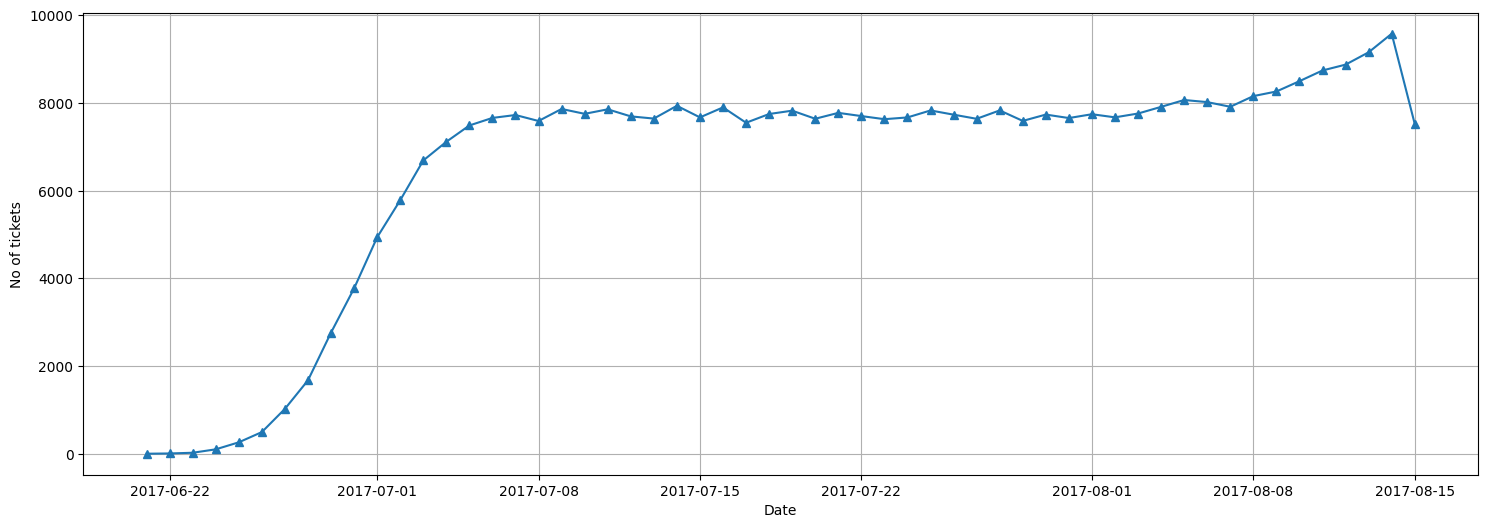

In [ ]:
plt.figure(figsize=(18,6))
x = df2.groupby('date')[['date']].count()    # to get into dataframe use 2D list
plt.plot(x.index, x['date'], marker='^')
plt.xlabel('Date')
plt.ylabel('No of tickets')
plt.grid('b')
plt.show()

In [ ]:
y = df2.groupby('date')[['total_amount']].sum()

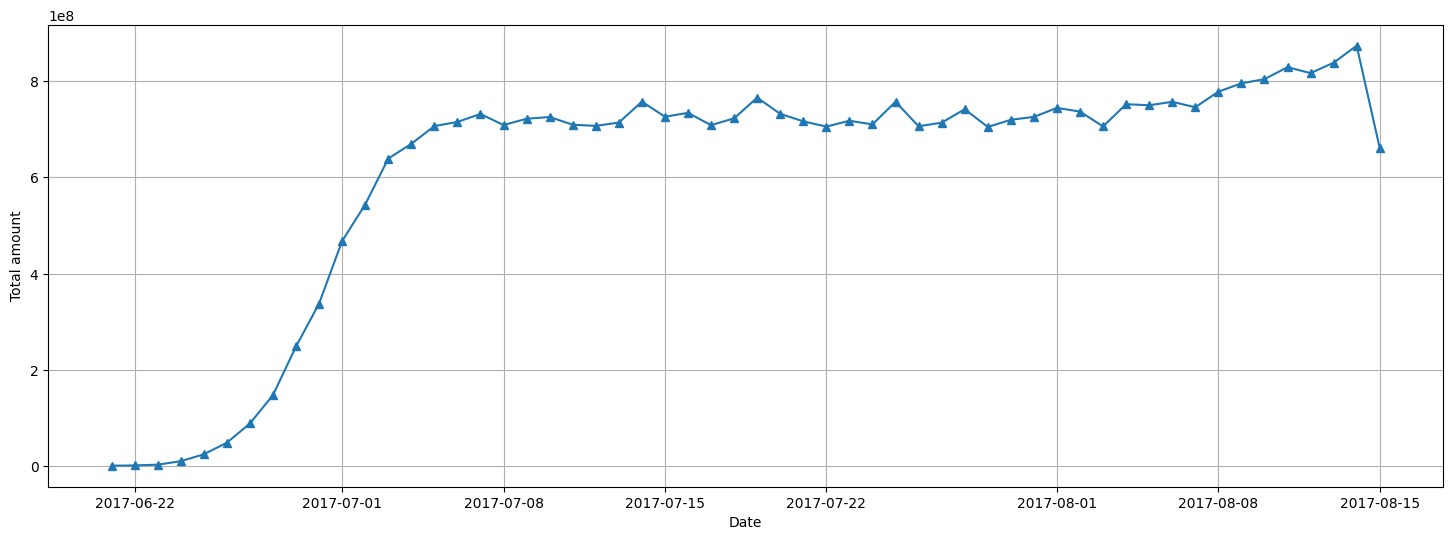

In [ ]:
plt.figure(figsize=(18,6))
y = df2.groupby('date')[['total_amount']].sum()    # to get into dataframe use 2D list
plt.plot(y.index, y['total_amount'], marker='^')
plt.xlabel('Date')
plt.ylabel('Total amount')
plt.grid('b')
plt.show()

In [ ]:
# Q3.Calculate the average charges for each aircraft with different fare conditions?
df3 = pd.read_sql_query('''
select * from ticket_flights as tf
join flights as f
on tf.flight_id = f.flight_id ''', con=connection)
df3.head()

,ticket_no,flight_id,fare_conditions,amount,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,0005432159776,30625,Business,42100,30625,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO,Arrived,773,2017-07-16 18:18:00+03,2017-07-16 20:04:00+03
1,0005435212351,30625,Business,42100,30625,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO,Arrived,773,2017-07-16 18:18:00+03,2017-07-16 20:04:00+03
2,0005435212386,30625,Business,42100,30625,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO,Arrived,773,2017-07-16 18:18:00+03,2017-07-16 20:04:00+03
3,0005435212381,30625,Business,42100,30625,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO,Arrived,773,2017-07-16 18:18:00+03,2017-07-16 20:04:00+03
4,0005432211370,30625,Business,42100,30625,PG0013,2017-07-16 18:15:00+03,2017-07-16 20:00:00+03,AER,SVO,Arrived,773,2017-07-16 18:18:00+03,2017-07-16 20:04:00+03


In [ ]:
df3 = pd.read_sql_query('''
select fare_conditions, aircraft_code, avg(amount) as average
from ticket_flights as tf
join flights as f
on tf.flight_id = f.flight_id
group by fare_conditions, aircraft_code''', con=connection)
df3.head()

,fare_conditions,aircraft_code,average
0,Business,319,113550.55770292656
1,Business,321,34435.66266431457
2,Business,733,41865.626175253856
3,Business,763,82839.84286649604
4,Business,773,57779.90943535718


<Axes: xlabel='aircraft_code', ylabel='average'>

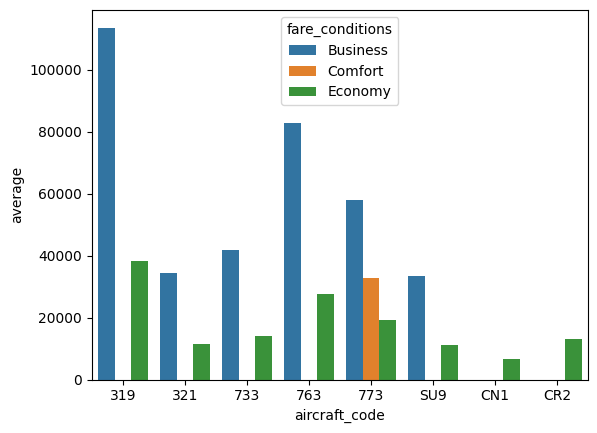

In [ ]:
# plotting bar chart to visualise
sns.barplot(data=df3, x=df3['aircraft_code'], y=df3['average'], hue=df3['fare_conditions'])

### **Analysing Occupancy Rate**

In [ ]:
# Q4. For each aircraft, calculate the total revenue per year and the average revenue per ticket.
df4 = pd.read_sql_query('''
select aircraft_code, sum(amount) as total_revenue
from flights as f
join ticket_flights as tf
on f.flight_id = tf.flight_id
group by aircraft_code''', con=connection)
df4.head()

,aircraft_code,total_revenue
0,319,2706163100
1,321,1638164100
2,733,1426552100
3,763,4371277100
4,773,3431205500


In [ ]:
df4 = pd.read_sql_query('''
select aircraft_code, sum(amount) as total_revenue, count(*) as ticket_count
from flights as f
join ticket_flights as tf
on f.flight_id = tf.flight_id
group by aircraft_code''', con=connection)
df4.head()

In [ ]:
# Using sub-query
df4 = pd.read_sql_query('''
select aircraft_code, total_revenue, total_revenue/ticket_count as avg_revenue
from
(select aircraft_code, sum(amount) as total_revenue, count(*) as ticket_count
from flights as f
join ticket_flights as tf
on f.flight_id = tf.flight_id
group by aircraft_code)''', con=connection)

# Using CTEs
df4 = pd.read_sql_query('''
with cte as(
  select aircraft_code, sum(amount) as total_revenue, count(*) as ticket_count
  from flights as f
  join ticket_flights as tf
  on f.flight_id = tf.flight_id
  group by aircraft_code
  )
  select aircraft_code, total_revenue, total_revenue/ticket_count as avg_revenue
  from cte''', con=connection)
df4

,aircraft_code,total_revenue,avg_revenue
0,319,2706163100,51201
1,321,1638164100,15291
2,733,1426552100,16568
3,763,4371277100,35033
4,773,3431205500,23765
5,CN1,96373800,6568
6,CR2,1982760500,13207
7,SU9,5114484700,13985


In [ ]:
# Q5. Calculate the average occupancy per aircraft. (occupanct_rate = booked_seat/available_seat)
# Method-1: using SQL
pd.read_sql_query('''
select aircraft_code, f.flight_id, count(seat_no) as seat_count
from flights as f
join boarding_passes as bp
on f.flight_id = bp.flight_id
group by aircraft_code, f.flight_id''', con=connection)

,aircraft_code,flight_id,seat_count
0,319,1162,51
1,319,1166,54
2,319,1167,57
3,319,1168,60
4,319,1170,58
...,...,...,...
11513,SU9,32925,12
11514,SU9,32928,25
11515,SU9,32931,12
11516,SU9,32933,16


In [ ]:
pd.read_sql_query('''
select aircraft_code, count(seat_no) as num_seat
from seats
group by aircraft_code''', con=connection)

,aircraft_code,num_seat
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402
6,CN1,12
7,CR2,50
8,SU9,97


In [ ]:
# Joining above two table
occupancy_rates = pd.read_sql_query('''
select a.aircraft_code, avg(a.seat_count) as booked_seat, b.num_seat as total_seat, avg(a.seat_count)/b.num_seat as occupancy_rate
from(
  select aircraft_code, f.flight_id, count(seat_no) as seat_count
  from flights as f
  join boarding_passes as bp
  on f.flight_id = bp.flight_id
  group by aircraft_code, f.flight_id
  ) as a
inner join(
  select aircraft_code, count(seat_no) as num_seat
  from seats
  group by aircraft_code
  ) as b
on a.aircraft_code = b.aircraft_code
group by a.aircraft_code''', con=connection)
occupancy_rates

,aircraft_code,booked_seat,total_seat,occupancy_rate
0,319,53.58318098720292,116,0.46192397402761143
1,321,88.80923076923077,170,0.5224072398190045
2,733,80.25546218487395,130,0.617349709114415
3,763,113.93729372937294,222,0.5132310528350132
4,773,264.9258064516129,402,0.659019419033863
5,CN1,6.004431314623338,12,0.5003692762186115
6,CR2,21.48284690220174,50,0.42965693804403476
7,SU9,56.81211267605634,97,0.5856918832583128


In [ ]:
# Method-2: using pandas
df5a = pd.read_sql_query('''
select aircraft_code, f.flight_id, count(seat_no) as seat_count
from flights as f
join boarding_passes as bp
on f.flight_id = bp.flight_id
group by aircraft_code, f.flight_id''', con=connection)
df5a.head()

,aircraft_code,flight_id,seat_count
0,319,1162,51
1,319,1166,54
2,319,1167,57
3,319,1168,60
4,319,1170,58


In [ ]:
df5b = pd.read_sql_query('''
select aircraft_code, count(seat_no) as num_seat
from seats
group by aircraft_code''', con=connection)
df5b

,aircraft_code,num_seat
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402
6,CN1,12
7,CR2,50
8,SU9,97


In [ ]:
# Combining above two table
# df5 = pd.concat([df5a, df5b], axis=1)
df5 = pd.merge(df5a, df5b, on='aircraft_code')
df5['occupancy_rate'] = (df5['seat_count']/df5['num_seat'])*100
df5.head()

,aircraft_code,flight_id,seat_count,num_seat,occupancy_rate
0,319,1162,51,116,43.96551724137931
1,319,1166,54,116,46.55172413793103
2,319,1167,57,116,49.137931034482754
3,319,1168,60,116,51.724137931034484
4,319,1170,58,116,50.0


In [ ]:
df_occupancy = df5.groupby('aircraft_code')['occupancy_rate'].mean().to_frame()
df_occupancy

,occupancy_rate
aircraft_code,
319,46.19239740276114
321,52.24072398190045
733,61.73497091144151
763,51.32310528350132
773,65.9019419033863
CN1,50.03692762186115
CR2,42.96569380440348
SU9,58.56918832583128


In [ ]:
# Q6. Calculate by how much the total annual turnover could increase by giving all aircraft a 10% higher occupancy rate.
# Method-1: using SQL
occupancy_rates['Inc_occupancy_rate'] = occupancy_rates['occupancy_rate']+occupancy_rates['occupancy_rate']*0.10
occupancy_rates

,aircraft_code,booked_seat,total_seat,occupancy_rate,Inc_occupancy_rate
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144


In [ ]:
total_revenue = pd.read_sql_query('''
select aircraft_code, sum(amount) as total_revenue
from flights as f
join ticket_flights as tf
on f.flight_id = tf.flight_id
group by aircraft_code''', con=connection)
total_revenue

,aircraft_code,total_revenue
0,319,2706163100
1,321,1638164100
2,733,1426552100
3,763,4371277100
4,773,3431205500
5,CN1,96373800
6,CR2,1982760500
7,SU9,5114484700


In [ ]:
# To view all the exponential number
pd.set_option('display.float_format', str)

In [ ]:
occupancy_rates['Inc_total_annual_turnover'] = (total_revenue['total_revenue']/occupancy_rates['occupancy_rate'])*occupancy_rates['Inc_occupancy_rate']
occupancy_rates

,aircraft_code,booked_seat,total_seat,occupancy_rate,Inc_occupancy_rate,Inc_total_annual_turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999


In [ ]:
# Method-2: using pandas (taken reference from above made tables)
df_occupancy['Inc_occupancy_rate'] = df_occupancy['occupancy_rate'] + df_occupancy['occupancy_rate']*0.10
df_occupancy

,occupancy_rate,Inc_occupancy_rate
aircraft_code,,
319,46.19239740276114,50.81163714303725
321,52.24072398190045,57.4647963800905
733,61.73497091144151,67.90846800258566
763,51.32310528350132,56.45541581185145
773,65.9019419033863,72.49213609372494
CN1,50.03692762186115,55.04062038404727
CR2,42.96569380440348,47.262263184843825
SU9,58.56918832583128,64.42610715841441


In [ ]:
df4

,aircraft_code,total_revenue,avg_revenue
0,319,2706163100,51201
1,321,1638164100,15291
2,733,1426552100,16568
3,763,4371277100,35033
4,773,3431205500,23765
5,CN1,96373800,6568
6,CR2,1982760500,13207
7,SU9,5114484700,13985


In [ ]:
df_occupancy = df_occupancy.merge(df4, on='aircraft_code')
df_occupancy

,aircraft_code,occupancy_rate,Inc_occupancy_rate,total_revenue,avg_revenue
0,319,46.19239740276114,50.81163714303725,2706163100,51201
1,321,52.24072398190045,57.4647963800905,1638164100,15291
2,733,61.73497091144151,67.90846800258566,1426552100,16568
3,763,51.32310528350132,56.45541581185145,4371277100,35033
4,773,65.9019419033863,72.49213609372494,3431205500,23765
5,CN1,50.03692762186115,55.04062038404727,96373800,6568
6,CR2,42.96569380440348,47.262263184843825,1982760500,13207
7,SU9,58.56918832583128,64.42610715841441,5114484700,13985


In [ ]:
df_occupancy['Inc_total_annual_turnover'] = (df_occupancy['total_revenue']/df_occupancy['occupancy_rate'])*df_occupancy['Inc_occupancy_rate']
df_occupancy

,aircraft_code,occupancy_rate,Inc_occupancy_rate,total_revenue,avg_revenue,Inc_total_annual_turnover
0,319,46.19239740276114,50.81163714303725,2706163100,51201,2976779410.0
1,321,52.24072398190045,57.4647963800905,1638164100,15291,1801980510.0
2,733,61.73497091144151,67.90846800258566,1426552100,16568,1569207310.0
3,763,51.32310528350132,56.45541581185145,4371277100,35033,4808404810.0
4,773,65.9019419033863,72.49213609372494,3431205500,23765,3774326050.0
5,CN1,50.03692762186115,55.04062038404727,96373800,6568,106011180.00000001
6,CR2,42.96569380440348,47.262263184843825,1982760500,13207,2181036549.9999995
7,SU9,58.56918832583128,64.42610715841441,5114484700,13985,5625933170.0


In [ ]:
df_occupancy['net_increase'] = df_occupancy['Inc_total_annual_turnover'] - df_occupancy['total_revenue']
df_occupancy

,aircraft_code,occupancy_rate,Inc_occupancy_rate,total_revenue,avg_revenue,Inc_total_annual_turnover,net_increase
0,319,46.19239740276114,50.81163714303725,2706163100,51201,2976779410.0,270616310.0
1,321,52.24072398190045,57.4647963800905,1638164100,15291,1801980510.0,163816410.0
2,733,61.73497091144151,67.90846800258566,1426552100,16568,1569207310.0,142655210.0
3,763,51.32310528350132,56.45541581185145,4371277100,35033,4808404810.0,437127710.0
4,773,65.9019419033863,72.49213609372494,3431205500,23765,3774326050.0,343120550.0
5,CN1,50.03692762186115,55.04062038404727,96373800,6568,106011180.00000001,9637380.000000015
6,CR2,42.96569380440348,47.262263184843825,1982760500,13207,2181036549.9999995,198276049.99999952
7,SU9,58.56918832583128,64.42610715841441,5114484700,13985,5625933170.0,511448470.0
